<a href="https://colab.research.google.com/github/lucasmoore2k/Back-End-Projects/blob/master/Aula5_Enem_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
enem = pd.read_csv('https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')

In [40]:
##Descartando NaN
colunas_notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
enem_notas = enem[colunas_notas].dropna()
enem_notas.columns = ['naturais','humanas','linguagens','matematica','redacao']
enem_notas.head()

,naturais,humanas,linguagens,matematica,redacao
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
6,428.5,505.2,521.0,436.8,560.0
8,491.8,575.7,524.4,487.6,660.0


In [0]:
#Prever dados
#A ideia do machine learning é TREINAR dados e TESTAR para prever hipotese

#Teste 1
#Usar conjunto de dados,nesse caso algumas COLUNAS e tentar a advinhar UMA/RESTANTE das colunas para
#prever os resultados

In [42]:
colunas_teste = enem_notas[['naturais','humanas','matematica','redacao']]
colunas_teste.head()

,naturais,humanas,matematica,redacao
1,523.1,671.3,738.0,680.0
2,409.2,531.7,438.1,600.0
3,452.3,505.5,544.9,400.0
6,428.5,505.2,436.8,560.0
8,491.8,575.7,487.6,660.0


In [43]:
colunas_advinhar = enem_notas['linguagens']
colunas_advinhar

1         661.6
2         389.0
3         448.5
6         521.0
8         524.4
          ...  
137835    504.8
137836    528.5
137838    538.3
137840    468.1
137842    527.7
Name: linguagens, Length: 97270, dtype: float64

In [44]:
#Leitura: Dado que eu tenho os 4 numeros da primeira linha eu quero o 5o numero
#Chamo o que eu desejo de y e o que eu tenho de x

x= colunas_teste

y =  enem_notas['linguagens']
y

1         661.6
2         389.0
3         448.5
6         521.0
8         524.4
          ...  
137835    504.8
137836    528.5
137838    538.3
137840    468.1
137842    527.7
Name: linguagens, Length: 97270, dtype: float64

In [45]:
#Algoritmo de machine learning

from sklearn.model_selection import train_test_split

train_test_split(x,y)

[       naturais  humanas  matematica  redacao
 56361     449.2    570.6       588.3    620.0
 89694     558.5    664.8       628.5    620.0
 14730     405.6    411.6       471.3    300.0
 83151     474.4    501.9       486.3    340.0
 59994     476.2    512.7       574.1    680.0
 ...         ...      ...         ...      ...
 74819     464.9    602.9       421.9    300.0
 4622      473.5    412.3       636.8      0.0
 36247     572.4    624.1       636.3    640.0
 93171     418.5    481.5       401.5    360.0
 90514     434.0    613.6       682.4    620.0
 
 [72952 rows x 4 columns],         naturais  humanas  matematica  redacao
 45552      482.5    456.5       492.2    460.0
 37526      410.5    510.8       420.1    300.0
 81324      457.0    635.4       455.8    560.0
 106272     522.7    555.0       537.4    580.0
 51996      550.6    564.2       532.2    720.0
 ...          ...      ...         ...      ...
 104781     452.1    531.4       583.3    580.0
 115190     522.8    572

In [46]:
#Tenho que atribuir valores de TREINO e TESTE para retornar as váriaveis que desejo
#Se eu desejar SETAR valores para não ter aleatoriedade no caso da repetição do algoritmo,
#Eu posso colocar o random_state = numero qualquer ou importar a biblioteca numpy 
#Setando o np.random.seed(outronumeroqualquer)

x_treino,x_teste,y_treino,y_teste = train_test_split(x,y)

#Treinando o x
x_treino.head()

,naturais,humanas,matematica,redacao
12316,413.6,528.8,411.8,340.0
97639,384.4,412.5,506.1,120.0
56971,554.4,650.5,626.5,320.0
29654,512.3,530.4,477.7,360.0
37825,430.1,532.3,498.4,520.0


In [0]:
#Eu posso importar vários algoritmos para treinar e testar,o escolhido foi o svc
from sklearn.svm import LinearSVR

In [0]:
#Overfit é quando eu treino um algoritmo que só funciona numa escala que so preve os mesmos dados

In [49]:
#Treinando o algoritmo
modelo = LinearSVR()
modelo.fit(x_treino,y_treino)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [50]:
#Usando o modelo de teste do X
modelo.predict(x_teste)

array([513.24587743, 548.26027986, 545.9109905 , ..., 550.09728303,
       434.67978471, 467.78362976])

In [51]:
predicoes_linguagens = modelo.predict(x_teste)
predicoes_linguagens[:5]

array([513.24587743, 548.26027986, 545.9109905 , 483.44328879,
       610.0069602 ])

In [52]:
#Para prever o Y
y_teste[:5]

46600     399.7
84953     573.6
120146    559.9
37902     477.8
85403     608.7
Name: linguagens, dtype: float64

In [0]:
#Essa leitura dos valores mostra que o algortimo tentou prever com base no x
#os valores de y,como pode-se observar teve valores próximos


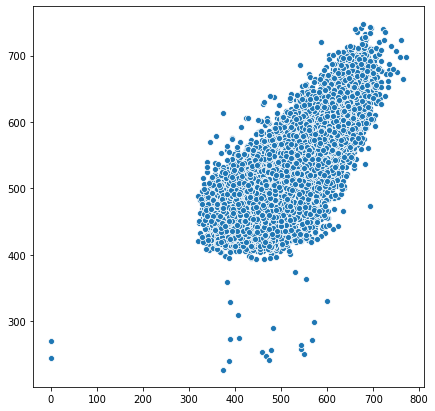

In [53]:
#PLOTANDO GRÁFICO para ANÁLISE
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_teste.values, y=predicoes_linguagens,)

In [0]:
##Leitura = X são as notad tiras, Y são notas da predição

In [0]:
#Está usando regressão(SVR) pq buscam variáveis reais
#Se for do tipo de classificação : vermelho,azul...usa SVC

In [56]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(x_treino,y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Plotar gráfico comparando com a coluna de matemática para descobrir as predições para linguagens

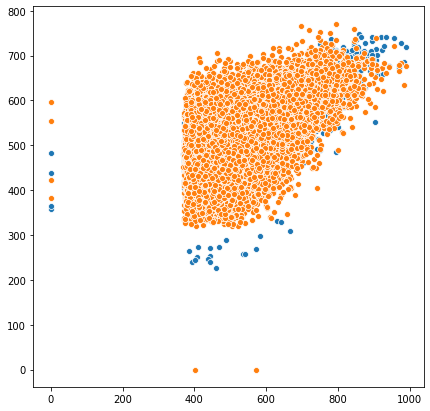

In [58]:

plt.figure(figsize=(7,7))
sns.scatterplot(x=x_teste['matematica'].values, y= predicoes_linguagens)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [0]:
##Leitura = X são as notad tiras, Y são notas da predição
##Azul=predicao, Laranja=Real

In [61]:
#CALCULO DO ERRO => Para saber a eficiencia do algoritmo
#Usando mean_squared
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste,predicoes_linguagens)


2176.995478813479

Esse valor mostra que a distancia entre a predição e o ponto real é  ~ 45

In [65]:
#Erro usando dummy
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste,dummy_predicoes)

5160.469771284238

Esse valor mostra que a distancia entre a predição e o ponto real é  ~ 75

In [0]:
#O dummy tem mais erro que o squarred

Desafio :
-Prever o restante das matérias,explorar por própria